# Machine Learning
## Assignment - 2
written by : Jameel Ahmed Syed
email : j.syed@innopolis.university

# Task - 1

<hr>

Contents
(i) Data Reading and preprocessing;
   1. Import All the Necessary Libraries
   2. Read the train and test datasets from csv files
   3. Profile Report for the training and testing data
   4. Exploring data, PCA
   5. Detecting and Removing the Outliers
   6. Splitting the targets from the train and test dataframe
   7. Data Preprocessing (Imputing, Feature Selection, Scaling...etc)
   8. Imputing the missing values in the target
   9. Merge back the X and Y of the train and test datasets
   10. Features Engineering, Selected features after the data preprocessing
   11. Split the data to train (80% of train), validation (20% of train) and test

(ii) Machine learning or Deep learning model defining, training and hyperparameters turning and
(iii) Model performance evaluation
   1. Dataset Class
   2. Hyperparameters
   3. DataLoading in a Dataloader for train, val, and test datasets
   4. Tensorboard Initialization for Task-1.1
   5. Simple Neural Network Class
   6. Simple Neural Network Training and Testing Loop Functions
   7. Loss and Optimizers
   8. Training the Simple Neural Network
   9. Testing the model on Train, Validation and Testing datasets
   10. Save the model
   11. Class wise Accuracy of the trained Model
   12. Print Metrics Function
   13. Ensemble Learning for Neural Network (3 Models)
   14. Save Ensemble Learning Models
   15. Decision Tree Classifier Simple and its graphs
   16. Random Over sampling
   17. Ensemble Learning of Decision Tree Classifier with Random Over sampled datasets
   18. Ensemble Learning of Decision Tree Classifier with preprocessed datasets

(iv) Conclusion and possible improvements


# (i) Data Reading, Exploration and preprocessing;

#### 1. Import All the Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from pandas_profiling import ProfileReport
from category_encoders import OneHotEncoder, BinaryEncoder, SumEncoder, PolynomialEncoder
import seaborn as sns
import torch
import torchvision
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, MultiLabelBinarizer
from sklearn.metrics import precision_recall_fscore_support, recall_score, precision_score, accuracy_score
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn import tree

# import tensorflow as tf

from torch.utils.tensorboard import SummaryWriter

from scipy.stats import mode

from sklearn import tree
import graphviz

import torch.nn.functional as F

#### 2. Read the train and test data from csv files

In [3]:
!wget https://www.dropbox.com/s/bvl10ummn4r5jl4/stream_quality_train.csv
!wget https://www.dropbox.com/s/sjq7skluyey5vun/stream_quality_test.csv

--2022-11-20 23:23:26--  https://www.dropbox.com/s/bvl10ummn4r5jl4/stream_quality_train.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.71.18, 2620:100:6026:18::a27d:4612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.71.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/bvl10ummn4r5jl4/stream_quality_train.csv [following]
--2022-11-20 23:23:27--  https://www.dropbox.com/s/raw/bvl10ummn4r5jl4/stream_quality_train.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb3e7c332e8bb153b7e1673f675.dl.dropboxusercontent.com/cd/0/inline/BxLc3Ga58oAxU0_tZVqw-8Z7EtuVcpo-0HP4gZnT4gDMPq_X-OgvMSm15o7O65iEG8YqVPY64JWhZM6lpkl7eVtJ-J09goEbfyFMt5yFnpOTr4TSCJape28rH_f00uCSi1EgBzN67GMupLgLceSr8L21MFc0YytaI5GlA9Af8v9YkA/file# [following]
--2022-11-20 23:23:28--  https://ucb3e7c332e8bb153b7e1673f675.dl.dropboxusercontent.com/cd/0/inline/BxLc3Ga58oAxU0_tZVqw-8Z7EtuVcpo-0HP4gZnT4

In [4]:
stream_df = pd.read_csv("./stream_quality_train.csv", low_memory=False)
stream_df_test = pd.read_csv("./stream_quality_test.csv", low_memory=False)

#### 3. Profile Report for the training and testing data

In [5]:
# Profile Report in .html format
#profile_1 = ProfileReport(stream_df)
#profile_1.to_file("Stream-Train-Profile-Report.html")
#profile_2 = ProfileReport(stream_df_test)
#profile_2.to_file("Stream-Test-Profile-Report.html")

In [6]:
#%matplotlib inline
#profile_1.to_notebook_iframe()

#### 4. Exploring data, PCA,

Checking for null values

In [7]:
stream_df.describe()

fps_mean        fps_std      rtt_mean        rtt_std  \
count  760552.000000  760552.000000  7.605520e+05  760552.000000   
mean        0.575619       0.084300  2.353770e-01       0.088225   
std         0.170309       0.071949  1.693772e-01       0.070063   
min         0.000009       0.000000  8.172605e-08       0.000000   
25%         0.481276       0.026552  1.000164e-01       0.029382   
50%         0.562577       0.070090  2.008302e-01       0.072972   
75%         0.677110       0.127345  3.417325e-01       0.134299   
max         1.000000       0.510244  1.000000e+00       0.510244   

       dropped_frames_mean  dropped_frames_std  dropped_frames_max  \
count        760552.000000       760552.000000       760552.000000   
mean              0.382662            0.013620            0.432770   
std               0.473576            0.053073            0.478378   
min               0.000002            0.000000            0.000002   
25%               0.001971            0.000000            0.002502   
50%               0.026125            0.000000            0.052873   
75%               1.000000            0.000000            1.000000   
max               1.000000            0.510751            1.000000   

       bitrate_mean    bitrate_std  packet_loss_rate  packet_loss_std  \
count  7.605520e+05  760552.000000     760552.000000    760552.000000   
mean   3.954155e-01       0.113201          0.214765         0.053166   
std    1.828442e-01       0.071366          0.362223         0.086220   
min    1.965486e-08       0.000000          0.000010         0.000000   
25%    2.623990e-01       0.060729          0.000999         0.000000   
50%    4.515029e-01       0.109705          0.041986         0.000000   
75%    5.326837e-01       0.160673          0.150246         0.093241   
max    1.000000e+00       0.503595          1.000000         0.510626   

                   y  
count  760552.000000  
mean        1.191775  
std         0.841875  
min         0.000000  
25%         0.000000  
50%         1.000000  
75%         2.000000  
max         2.000000

In [8]:
stream_df.isnull().sum()

fps_mean               0
fps_std                0
rtt_mean               0
rtt_std                0
dropped_frames_mean    0
dropped_frames_std     0
dropped_frames_max     0
bitrate_mean           0
bitrate_std            0
packet_loss_rate       0
packet_loss_std        0
y                      0
dtype: int64

In [9]:
np.sum(np.sum(np.isnan(stream_df)))

0

In [10]:
np.sum(np.sum(np.isnan(stream_df_test)))

0

Number of classes

In [11]:
stream_df["y"].nunique()

3

Each Class Distribution

In [12]:
stream_df["y"].value_counts()

2.0    356435
0.0    210580
1.0    193537
Name: y, dtype: int64

Each feature distribution

In [13]:
stream_df.agg(['count'])

fps_mean  fps_std  rtt_mean  rtt_std  dropped_frames_mean  \
count    760552   760552    760552   760552               760552   

       dropped_frames_std  dropped_frames_max  bitrate_mean  bitrate_std  \
count              760552              760552        760552       760552   

       packet_loss_rate  packet_loss_std       y  
count            760552           760552  760552

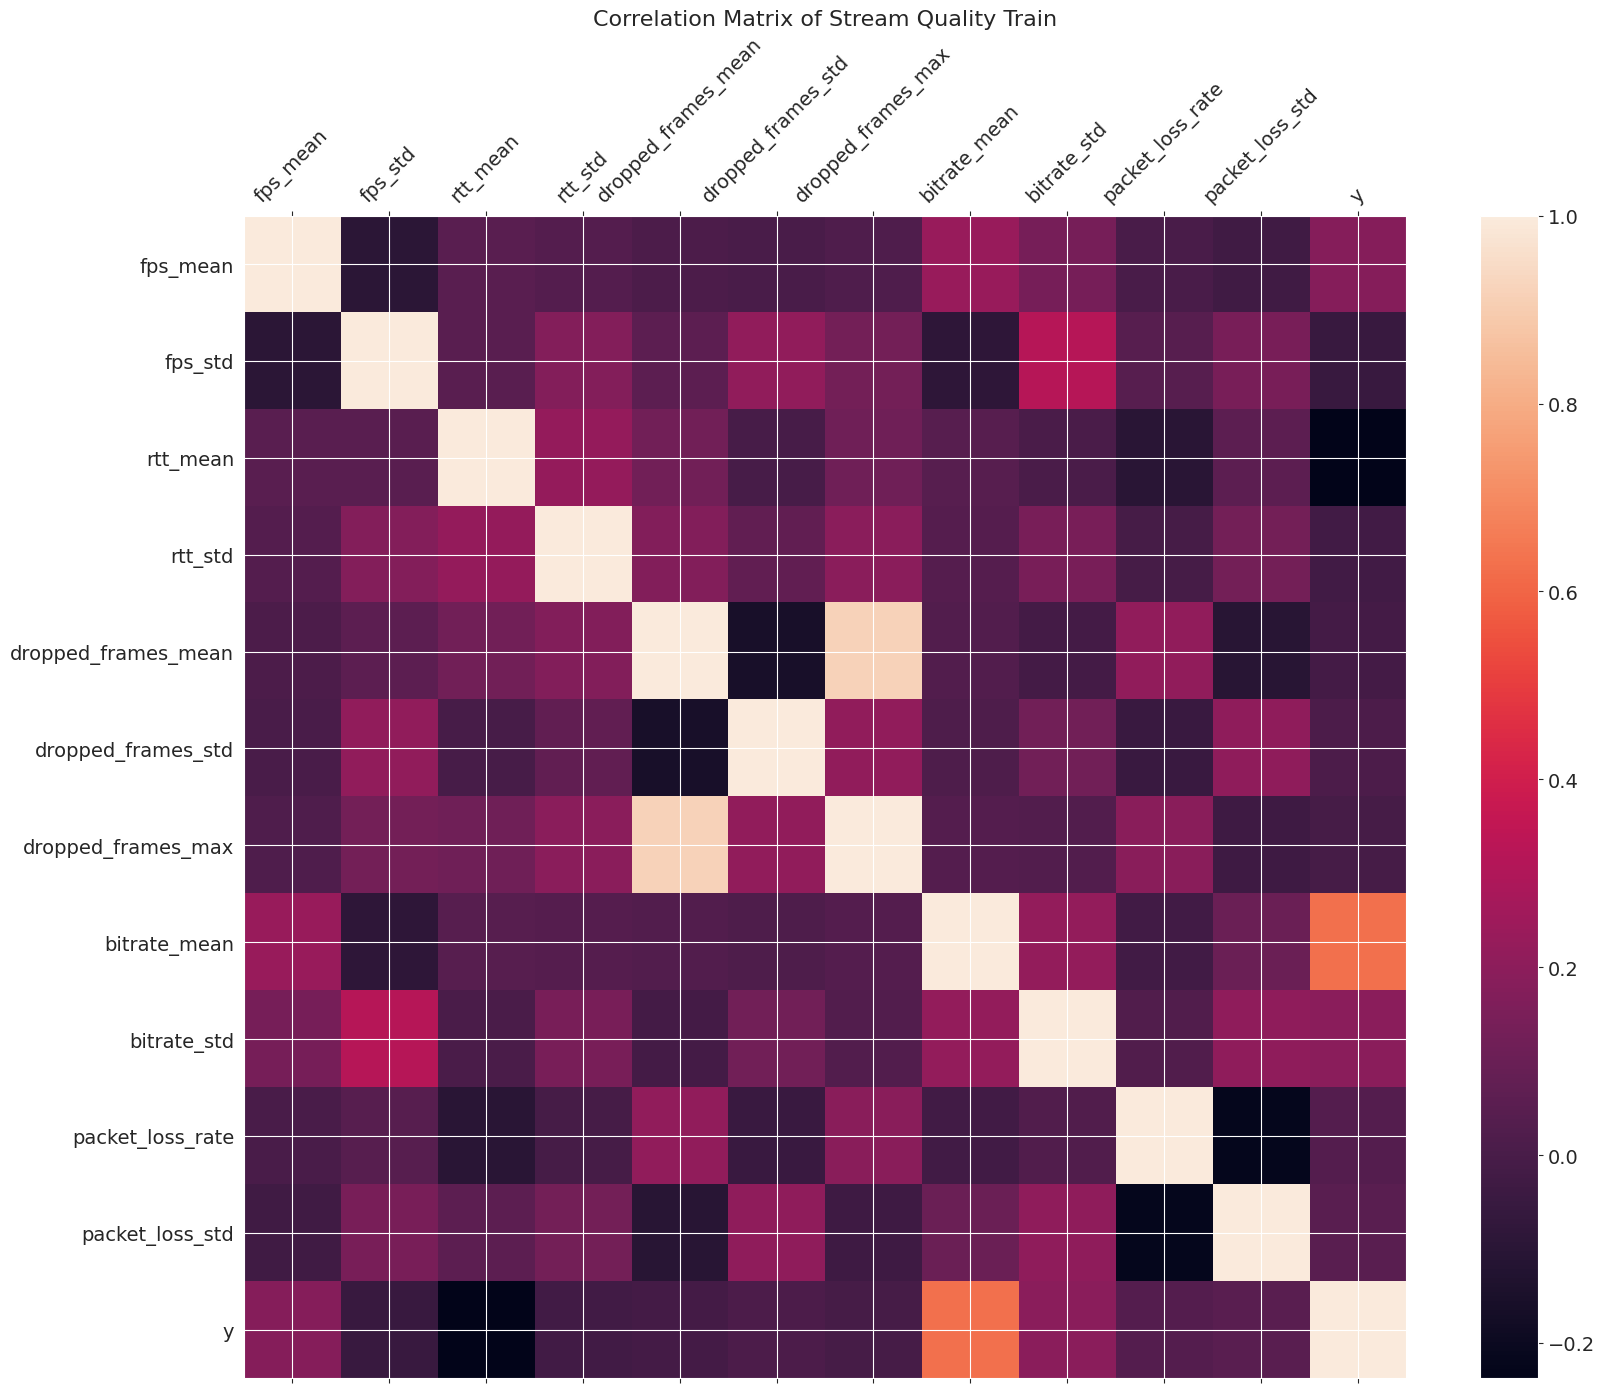

In [16]:
# Plot the correlation Matrix of the Bit Rate train
f = plt.figure(figsize=(19, 15))
plt.matshow(stream_df.corr(), fignum=f.number)
plt.xticks(range(stream_df.select_dtypes(['number']).shape[1]), stream_df.select_dtypes(['number']).columns, fontsize=14,
               rotation=45)
plt.yticks(range(stream_df.select_dtypes(['number']).shape[1]), stream_df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix of Stream Quality Train', fontsize=16)
plt.show()

In [14]:
stream_df.head()

fps_mean   fps_std  rtt_mean   rtt_std  dropped_frames_mean  \
0  0.744824  0.025512  0.786908  0.013918              0.00323   
1  0.744824  0.025512  0.810122  0.055803              0.00323   
2  0.734408  0.076537  0.791670  0.031781              0.00323   
3  0.750031  0.000000  0.826193  0.015573              0.00323   
4  0.703162  0.159856  0.816669  0.005438              0.00323   

   dropped_frames_std  dropped_frames_max  bitrate_mean  bitrate_std  \
0                 0.0             0.00323      0.066147     0.010390   
1                 0.0             0.00323      0.077022     0.041797   
2                 0.0             0.00323      0.069172     0.017070   
3                 0.0             0.00323      0.061703     0.021221   
4                 0.0             0.00323      0.040957     0.062898   

   packet_loss_rate  packet_loss_std    y  
0          0.000250         0.000000  1.0  
1          0.031492         0.153055  1.0  
2          0.000250         0.000000  1.0  
3          0.003121         0.014067  1.0  
4          0.003121         0.014067  1.0

In [15]:
stream_df.describe()

fps_mean        fps_std      rtt_mean        rtt_std  \
count  760552.000000  760552.000000  7.605520e+05  760552.000000   
mean        0.575619       0.084300  2.353770e-01       0.088225   
std         0.170309       0.071949  1.693772e-01       0.070063   
min         0.000009       0.000000  8.172605e-08       0.000000   
25%         0.481276       0.026552  1.000164e-01       0.029382   
50%         0.562577       0.070090  2.008302e-01       0.072972   
75%         0.677110       0.127345  3.417325e-01       0.134299   
max         1.000000       0.510244  1.000000e+00       0.510244   

       dropped_frames_mean  dropped_frames_std  dropped_frames_max  \
count        760552.000000       760552.000000       760552.000000   
mean              0.382662            0.013620            0.432770   
std               0.473576            0.053073            0.478378   
min               0.000002            0.000000            0.000002   
25%               0.001971            0.000000            0.002502   
50%               0.026125            0.000000            0.052873   
75%               1.000000            0.000000            1.000000   
max               1.000000            0.510751            1.000000   

       bitrate_mean    bitrate_std  packet_loss_rate  packet_loss_std  \
count  7.605520e+05  760552.000000     760552.000000    760552.000000   
mean   3.954155e-01       0.113201          0.214765         0.053166   
std    1.828442e-01       0.071366          0.362223         0.086220   
min    1.965486e-08       0.000000          0.000010         0.000000   
25%    2.623990e-01       0.060729          0.000999         0.000000   
50%    4.515029e-01       0.109705          0.041986         0.000000   
75%    5.326837e-01       0.160673          0.150246         0.093241   
max    1.000000e+00       0.503595          1.000000         0.510626   

                   y  
count  760552.000000  
mean        1.191775  
std         0.841875  
min         0.000000  
25%         0.000000  
50%         1.000000  
75%         2.000000  
max         2.000000

In [16]:
stream_df_test.describe()

fps_mean        fps_std      rtt_mean        rtt_std  \
count  129978.000000  129978.000000  1.299780e+05  129978.000000   
mean        0.562242       0.081462  2.193421e-01       0.085001   
std         0.164251       0.070950  1.625906e-01       0.068021   
min         0.000012       0.000000  1.391982e-07       0.000000   
25%         0.477536       0.022696  8.891946e-02       0.028232   
50%         0.550761       0.067979  1.878190e-01       0.070574   
75%         0.658131       0.124792  3.152932e-01       0.128603   
max         1.000000       0.510244  1.000000e+00       0.508469   

       dropped_frames_mean  dropped_frames_std  dropped_frames_max  \
count        129978.000000       129978.000000       129978.000000   
mean              0.339517            0.015303            0.393941   
std               0.460384            0.057180            0.471005   
min               0.000003            0.000000            0.000003   
25%               0.000999            0.000000            0.000999   
50%               0.018182            0.000000            0.037107   
75%               1.000000            0.000000            1.000000   
max               1.000000            0.510743            1.000000   

       bitrate_mean    bitrate_std  packet_loss_rate  packet_loss_std  \
count  1.299780e+05  129978.000000     129978.000000    129978.000000   
mean   3.972422e-01       0.112772          0.177990         0.055387   
std    1.813835e-01       0.070860          0.335288         0.087149   
min    1.596526e-08       0.000000          0.000011         0.000000   
25%    2.676697e-01       0.060610          0.000999         0.000000   
50%    4.502050e-01       0.109068          0.031705         0.000000   
75%    5.335235e-01       0.160607          0.106635         0.101940   
max    1.000000e+00       0.441708          1.000000         0.505441   

                   y  
count  129978.000000  
mean        1.217383  
std         0.857186  
min         0.000000  
25%         0.000000  
50%         1.000000  
75%         2.000000  
max         2.000000

#### 5. Detecting and Removing the Outliers

In [17]:
def remove_outliers(x, coln):
    """Detects and removes the outliers from the dataframe
    :param x: Dataframe
    :param coln: Feature/Column name from the dataframe"""
    q1 = x[coln].quantile(0.25)
    q3 = x[coln].quantile(0.75)
    iqr = q3-q1     # Inter quartile range
    thresh_low = q1-1.5*iqr
    thresh_high = q3+1.5*iqr
    df_out = x.loc[(x[coln] > thresh_low) & (x[coln] < thresh_high)]
    return df_out

# Remove Outliers from Train set

features = list()
for col in stream_df.drop(['y'], axis=1).columns:
    features.append(col)
print("All the features in training dataframe : \n", features)

print("\nstream_df shape before removing outliers: \n", stream_df.shape)
stream_df = remove_outliers(stream_df, features[1])   # removes fps_std outliers1
stream_df = remove_outliers(stream_df, features[2])   # removes fps_std outliers1
stream_df = remove_outliers(stream_df, features[3])   # removes fps_std outliers1
stream_df = remove_outliers(stream_df, features[4])   # removes rtt_mean outliers3
#stream_df = remove_outliers(stream_df, features[5])   # removes rtt_std outliers4 too much outliers
stream_df = remove_outliers(stream_df, features[6])   # removes rtt_std outliers4
stream_df = remove_outliers(stream_df, features[7])   # removes rtt_std outliers4 high outliers
#stream_df = remove_outliers(stream_df, features[8])   # removes rtt_std outliers4 too much outliers
stream_df = remove_outliers(stream_df, features[9])   # removes rtt_std outliers4
stream_df = remove_outliers(stream_df, features[10])   # removes rtt_std outliers4
stream_df = stream_df.drop(columns=['dropped_frames_std', 'bitrate_std'])
print("\nstream_df shape after removing outliers: \n", stream_df.shape)

All the features in training dataframe : 
 ['fps_mean', 'fps_std', 'rtt_mean', 'rtt_std', 'dropped_frames_mean', 'dropped_frames_std', 'dropped_frames_max', 'bitrate_mean', 'bitrate_std', 'packet_loss_rate', 'packet_loss_std']

stream_df shape before removing outliers: 
 (760552, 12)

stream_df shape after removing outliers: 
 (591441, 10)


In [18]:
# Remove Outliers from Test set
features = list()
for col in stream_df_test.drop(['y'], axis=1).columns:
    features.append(col)
print("All the features in stream quality test dataframe : \n", features)

print("\nstream quality test shape before removing outliers: \n", stream_df_test.shape)
stream_df_test = remove_outliers(stream_df_test, features[1])  # removes fps_std outliers
stream_df_test = remove_outliers(stream_df_test, features[2])  # removes fps_std outliers
stream_df_test = remove_outliers(stream_df_test, features[3])  # removes fps_std outliers
stream_df_test = remove_outliers(stream_df_test, features[4])  # removes rtt_mean outliers
#stream_df_test = remove_outliers(stream_df_test, features[5])  # removes rtt_std outliers
stream_df_test = remove_outliers(stream_df_test, features[6])  # removes rtt_std outliers
stream_df_test = remove_outliers(stream_df_test, features[7])  # removes fps_std outliers
stream_df_test = remove_outliers(stream_df_test, features[9])  # removes fps_std outliers
stream_df_test = remove_outliers(stream_df_test, features[10])  # removes rtt_std outliers
stream_df_test = stream_df_test.drop(columns=['dropped_frames_std', 'bitrate_std'])
print("\nstream quality test shape after removing outliers: \n", stream_df_test.shape)

All the features in stream quality test dataframe : 
 ['fps_mean', 'fps_std', 'rtt_mean', 'rtt_std', 'dropped_frames_mean', 'dropped_frames_std', 'dropped_frames_max', 'bitrate_mean', 'bitrate_std', 'packet_loss_rate', 'packet_loss_std']

stream quality test shape before removing outliers: 
 (129978, 12)

stream quality test shape after removing outliers: 
 (104516, 10)


#### 6. Splitting the targets from the train and test dataframe

In [19]:
# Splitting the 'stream_quality' column from the train_data
# and storing it in y_train, y_test respectively
# We Get the x_train, y_train and x_test, y_test data

X_train = stream_df.drop(columns=['y'])
y_train = stream_df.y
X_test = stream_df_test.drop(columns=['y'])  # Can use the columns arg to avoid writing axis = 1
y_test = stream_df_test.y

In [20]:
X_train.head()

fps_mean   fps_std  rtt_mean   rtt_std  dropped_frames_mean  \
16  0.250094  0.000000  0.000014  0.000000              0.00323   
17  0.250094  0.000000  0.000014  0.000000              0.00323   
18  0.250094  0.000000  0.000014  0.000000              0.00323   
19  0.983051  0.027827  0.161563  0.210044              1.00000   
20  0.990819  0.014118  0.290417  0.262646              1.00000   

    dropped_frames_max  bitrate_mean  packet_loss_rate  packet_loss_std  
16             0.00323      0.052138          0.000250         0.000000  
17             0.00323      0.030300          0.000250         0.000000  
18             0.00323      0.030322          0.000250         0.000000  
19             1.00000      0.100475          0.124343         0.000000  
20             1.00000      0.120929          0.197315         0.247224

#### 7. Data Preprocessing (Imputing, Feature Selection, Scaling...etc)

In [21]:

def impute_simple(x, strategy='mean'):
    """Imputes the Dataframe with the SimpleImputer
    :param x: X Dataframe which needs to be Imputed, Fitted and Transformed
    :param strategy: The strategy by which the dataframe needs to be imputed"""
    imputer = SimpleImputer(strategy='mean')
    imputer.fit(x)
    x = pd.DataFrame(imputer.transform(x), columns=x.columns)
    # print("\nImputed Bit Rate : \n", x)
    return x

def scale_std(x):
    """Scales the Dataframe with the RobustScaler
    :param x: X Dataframe which needs to be Scaled, Fitted and Transformed"""

    scaler = StandardScaler()   # change it back to RobustScaler
    scaler.fit(x)
    x = pd.DataFrame(scaler.transform(x), columns=x.columns)
    # print("\nScaled Bit Rate : \n", x)
    return x

def data_preprocessing(x):
    """Data preprocessing - Encoding, Imputing, Feature Selection, Scaling of the Dataframe
    :param x: X Dataframe which needs to be Encoded, Imputed,
     Scaled, Fitted and Transformed"""

    # Imputing the data with the mean x_train
    x = impute_simple(x, strategy='mean')

    # Feature Selection new technique
    print("Shape of dataframe before Feature Selection : ", x.shape)
    x = x.replace(0, np.nan)

    x = x.dropna(axis=1, thresh=0.05*len(x))
    print("Removed columns with 95% zeros")
    print("Shape of dataframe after Feature Selection : ", x.shape)
    x = x.replace(np.nan, 0)

    # Scaling the data with Robust Scaler x_train
    x = scale_std(x)
    return x

In [22]:
# Data preprocessing - Encoding, Imputing, Feature Selection, Scaling
print("\nData-preprocessing of x_train:", end="")
X_train = data_preprocessing(X_train)
print("\nData-preprocessing of x_test:", end="")
X_test = data_preprocessing(X_test)



Data-preprocessing of x_train:Shape of dataframe before Feature Selection :  (591441, 9)
Removed columns with 95% zeros
Shape of dataframe after Feature Selection :  (591441, 9)

Data-preprocessing of x_test:Shape of dataframe before Feature Selection :  (104516, 9)
Removed columns with 95% zeros
Shape of dataframe after Feature Selection :  (104516, 9)


In [23]:
X_train.head()

fps_mean   fps_std  rtt_mean   rtt_std  dropped_frames_mean  \
0 -1.984920 -1.220954 -1.527118 -1.327002            -0.715897   
1 -1.984920 -1.220954 -1.527118 -1.327002            -0.715897   
2 -1.984920 -1.220954 -1.527118 -1.327002            -0.715897   
3  2.474792 -0.793076 -0.481142  1.870447             1.461423   
4  2.522058 -1.003875  0.353143  2.671200             1.461423   

   dropped_frames_max  bitrate_mean  packet_loss_rate  packet_loss_std  
0           -0.813804     -1.933664         -0.704632        -0.715393  
1           -0.813804     -2.055633         -0.704632        -0.715393  
2           -0.813804     -2.055511         -0.704632        -0.715393  
3            1.316495     -1.663691          1.297175        -0.715393  
4            1.316495     -1.549453          2.474310         2.213815

### 8. Imputing the missing values in the target

In [24]:
def impute_missings(x):
    """Imputes the Dataframe with the SimpleImputer
    :param x: X Dataframe which needs to be Imputed, Fitted and Transformed
    :param strategy: The strategy by which the dataframe needs to be imputed"""
    imputer = SimpleImputer(strategy="most_frequent")
    x = np.array(x).reshape(-1, 1)
    x = imputer.fit_transform(x)
    x = pd.DataFrame(x, columns=['y'])
    x = x.squeeze()
    return x

In [25]:
y_train = impute_missings(y_train)
y_test = impute_missings(y_test)

In [26]:
#from imblearn.over_sampling import RandomOverSampler
#from imblearn.under_sampling import RandomUnderSampler

# Logistic Regression with Over sampling
#o_sampler = RandomOverSampler()
#print("y_train count : \n", y_train.value_counts())
#X_train, y_train = o_sampler.fit_resample(X_train, y_train)
#print("y_over count : \n", y_train.value_counts())

#### 9. Merge back the X and Y of the train and test datasets

In [27]:
XY_train_dataset = X_train.copy()
XY_train_dataset['y'] = y_train
XY_train_dataset.head()

fps_mean   fps_std  rtt_mean   rtt_std  dropped_frames_mean  \
0 -1.984920 -1.220954 -1.527118 -1.327002            -0.715897   
1 -1.984920 -1.220954 -1.527118 -1.327002            -0.715897   
2 -1.984920 -1.220954 -1.527118 -1.327002            -0.715897   
3  2.474792 -0.793076 -0.481142  1.870447             1.461423   
4  2.522058 -1.003875  0.353143  2.671200             1.461423   

   dropped_frames_max  bitrate_mean  packet_loss_rate  packet_loss_std    y  
0           -0.813804     -1.933664         -0.704632        -0.715393  0.0  
1           -0.813804     -2.055633         -0.704632        -0.715393  0.0  
2           -0.813804     -2.055511         -0.704632        -0.715393  0.0  
3            1.316495     -1.663691          1.297175        -0.715393  0.0  
4            1.316495     -1.549453          2.474310         2.213815  0.0

In [28]:
XY_test_dataset = X_test.copy()
XY_test_dataset['y'] = y_test
XY_test_dataset.head()

fps_mean   fps_std  rtt_mean   rtt_std  dropped_frames_mean  \
0  0.602344 -1.199059 -1.473309 -1.319726            -0.636836   
1  0.602344 -1.199059 -1.473309 -1.319726            -0.636836   
2  0.602344 -1.199059 -1.473309 -1.319726            -0.636836   
3  0.915484 -0.870310 -0.796346 -0.549508            -0.633526   
4  0.902702 -0.681959 -0.550229 -0.099979            -0.641190   

   dropped_frames_max  bitrate_mean  packet_loss_rate  packet_loss_std    y  
0           -0.736918     -2.146540         -0.736073        -0.714928  0.0  
1           -0.736918     -2.145816         -0.736073        -0.714928  0.0  
2           -0.736918     -2.148246         -0.736073        -0.714928  0.0  
3           -0.564488      0.466020         -0.448976         0.101384  2.0  
4           -0.741099     -0.313240          0.400667         0.807501  2.0

#### 10. Features Engineering, Selected features after the data preprocessing


In [29]:
# Selected Features after data preprocessing stage
selected_features = list()
for col in X_train.columns:
    selected_features.append(col)
print("\nSelected Features : ", selected_features)


Selected Features :  ['fps_mean', 'fps_std', 'rtt_mean', 'rtt_std', 'dropped_frames_mean', 'dropped_frames_max', 'bitrate_mean', 'packet_loss_rate', 'packet_loss_std']



Shape of x_train before PCA (591441, 9)


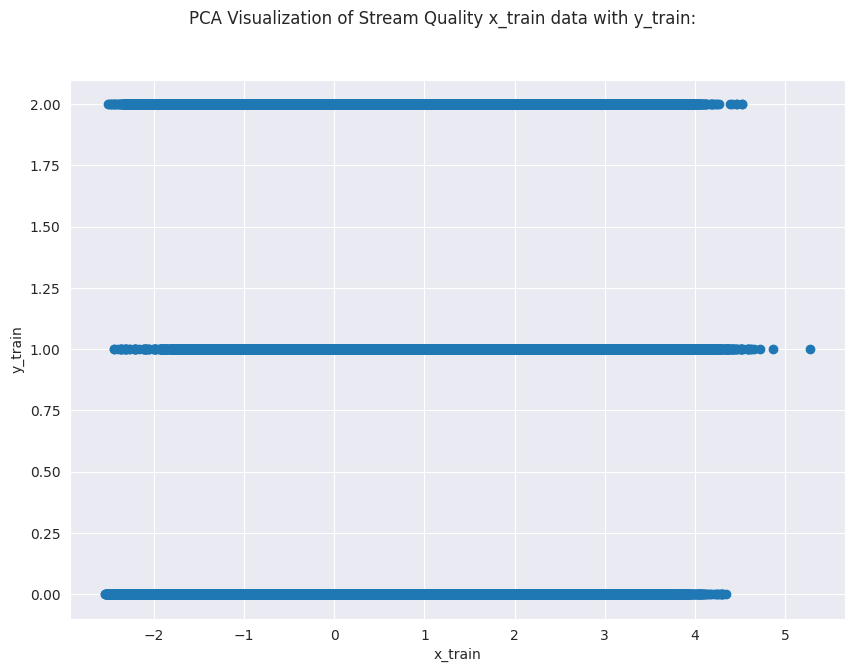


Shape of x_train after PCA (591441, 1)


In [30]:
# PCA Visualization of the Complete Dataframe x_train in 2dimensional graphs
print("\nShape of x_train before PCA", X_train.shape)
dimes_reducer = PCA(n_components=1)
x_train_reduced = dimes_reducer.fit_transform(X_train)
f = plt.figure(figsize=(10, 7))
plt.scatter(x_train_reduced[:, 0], y_train, marker='o')    # x_train_reduced[:, 1]
plt.suptitle("PCA Visualization of Stream Quality x_train data with y_train: ")
plt.xlabel("x_train")
plt.ylabel("y_train")
plt.show()
print("\nShape of x_train after PCA", x_train_reduced.shape)

#### 11. Split the data to train (80% of train), validation (20% of train) and test

In [31]:
# Split data
from sklearn.model_selection import train_test_split

XY_train_df, XY_val_df = train_test_split(XY_train_dataset, train_size=0.8)
print("Length of XY_train_df : ", len(XY_train_df))
print("Length of XY_val_df : ", len(XY_val_df))
print("Length of XY_test_dataset : ", len(XY_test_dataset))

Length of XY_train_df :  473152
Length of XY_val_df :  118289
Length of XY_test_dataset :  104516


In [32]:
XY_train_df['y'] = XY_train_df['y'].astype(int)

In [33]:
XY_train_df.head()

fps_mean   fps_std  rtt_mean   rtt_std  dropped_frames_mean  \
169441 -0.677353  0.387116 -0.485862  0.521633             1.461423   
522084 -1.588491 -0.531000 -0.879549  0.249415             1.461423   
63368   1.361253 -1.220954  0.146374  0.572708            -0.641082   
454535 -0.274110 -0.083840 -0.848186 -1.206937            -0.722784   
298845  0.296499 -1.220954  0.900868 -0.847667            -0.646756   

        dropped_frames_max  bitrate_mean  packet_loss_rate  packet_loss_std  y  
169441            1.316495     -1.861788         -0.430966         0.280419  0  
522084            1.316495      0.577432          0.676055        -0.715393  2  
63368            -0.740604      0.621268          1.128193        -0.715393  2  
454535           -0.820541     -1.489962         -0.318700         0.291408  0  
298845           -0.746156      1.056523         -0.700603        -0.715393  1

# (ii) Machine learning or Deep learning model defining, training and hyperparameters turning

#### 1. Dataset Class

In [34]:
class StreamDataset(Dataset):
    """
    This is a class for Custom Stream Quality Dataset.

    Parameters:
        dataset_np (numpy.array): The dataset in numpy array format.
    """
    def __init__(self, dataset_np):
        super(StreamDataset, self).__init__()
        self.xy = dataset_np
            # the last column is the class label and the rest are the features
        self.x = torch.from_numpy(self.xy[:, :self.xy.shape[1]-1])     # all rows and all columns except y
        self.y = torch.from_numpy(self.xy[:, self.xy.shape[1]-1])       # all rows of y
        self.n_samples = self.xy.shape[0]

    def __getitem__(self, item):
        return self.x[item], self.y[item].type(torch.LongTensor)

    def __len__(self):
        return self.n_samples

#### 2. Hyperparameters

In [35]:
# hyper parameters
input_size = 9
hidden_size = 400
n_classes = 3
n_epochs = 5
batch_size = 50
learning_rt = 0.001

#### 3. DataLoading in a Dataloader for train, val, and test datasets

In [36]:
def dataset_prepare(XY_train_np, XY_val_np, XY_test_np):
    """
    Returns Dataloaders from numpy datasets (Train, Validation, Testing datasets)
    """
    train_dataset = StreamDataset(XY_train_np)
    train_dataloader = DataLoader(dataset=train_dataset,
                                  batch_size=batch_size,
                                  shuffle=False,
                                  num_workers=2)

    val_dataset = StreamDataset(XY_val_np)
    val_dataloader = DataLoader(dataset=val_dataset,
                                batch_size=batch_size,
                                shuffle=False,
                                num_workers=2)

    test_dataset = StreamDataset(XY_test_np)
    test_dataloader = DataLoader(dataset=test_dataset,
                                 batch_size=batch_size,
                                 shuffle=False,
                                 num_workers=2)
    return train_dataloader, val_dataloader, test_dataloader

In [37]:
train_dataloader, val_dataloader, test_dataloader = dataset_prepare(
    np.array(XY_train_df).astype(np.float32),
    np.array(XY_val_df).astype(np.float32),
    np.array(XY_test_dataset).astype(np.float32)
)

#### 4. Tensorboard Initialization for Task-1.1

In [40]:
writer = SummaryWriter("runs/task1-1")

In [41]:
!tensorboard --logdir=runs

2022-11-20 21:01:23.704262: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-20 21:01:23.870942: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-20 21:01:24.445028: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-11-20 21:01:24.445086: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

#### 5. Simple Neural Network Class

In [43]:
class SimpleNet(nn.Module):
    """
    This is a class for Simple Neural Network.

    Parameters:
        input_size (int): The number of features in the dataset
        hidden_size (int): The number of hidden neurons
        num_classes (int): The number of classes or outputs in the dataset
    """
    def __init__(self, input_size, hidden_size, num_classes):
        super(SimpleNet, self).__init__()
        self.lin1 = nn.Linear(9, 500)
        self.bat1 = nn.BatchNorm1d(500)
        self.relu = nn.ReLU()
        self.lin2 = nn.Linear(500, 3)

    def forward(self, x):
        out = self.lin1(x)
        out = self.bat1(out)
        out = self.relu(out)
        out = self.lin2(out)
        out = nn.functional.softmax(out, dim=1)
        #out = nn.Softmax(out)
        # no softmax at the end as CrossEntropyLoss will apply it internally
        return out

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

model = SimpleNet(input_size=input_size, hidden_size=hidden_size, num_classes=n_classes).to(device)

cuda


#### 6. Simple Neural Network Training and Testing Loop Functions

In [44]:
n_correct = 0
n_samples = 0
plot_loss = []
plot_accuracy = []
def train(model, dataloader, optimizer, criterion, device, nth_model=1):
    """This Functions purpose is to train the model
    :param model: The model which we need to train
    :param dataloader: The dataset which we need to train on
    :param optimizer: The optimizer function by which the weights are to be updated
    :param criterion: The loss function
    :param device: cuda or cpu (On which device the model will be trained)
    """
    # training loop
    model.train()
    model_list = []
    global plot_loss, plot_accuracy
    plot_loss = []
    plot_accuracy = []
    running_loss = 0.0
    running_correct = 0
    n_total_steps = len(train_dataloader)
    for epoch in range(n_epochs):

        running_loss = 0.0
        for i, (data, labels) in enumerate(dataloader):

            labels = labels.type(torch.LongTensor)
            data = data.reshape(-1, 9).to(device)
            labels = labels.to(device)

            # Forward
            outputs = model(data)
            labels = labels

            # Loss
            loss = criterion(outputs, labels)

            # Backward
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # recording Loss and correct Predictions
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            running_correct += (predicted == labels).sum().item()

            if (i+1) % 1000 == 0:
                print(f"Model [{nth_model}/{nth_model}], Epoch: [{epoch+1}/{n_epochs}], Step [{i+1}/{n_total_steps}], loss = {loss.item():.4f}")

        acc = test(model, test_dataloader, device, name=f"Train Epoch {epoch+1}")
        model_list.append(model)
        writer.add_scalar(f'Accuracy/Test', acc, epoch)
        running_loss /= len(dataloader)
        writer.add_scalar(f'Loss/Train', running_loss, epoch)
        for tag,parm in model.named_parameters():
            writer.add_histogram(tag, parm.grad.data.cpu().numpy(), epoch)
    writer.flush()
    print(f"Training Ends")
    return model

def test(model, dataloader, device, name="Test"):
    """This Functions purpose is to test the model
    :param model: The model which we need to test
    :param dataloader: The dataset which we need to test on
    :param device: cuda or cpu (On which device the model will be tested)
    :param name: The name of the test dataset (Train, Validation or Test datasets)
    """
    # Testing
    print(f"\nTesting of {name} dataset begins")
    model.eval()
    with torch.no_grad():
        global n_correct, n_samples
        n_correct, n_samples = 0, 0
        for i, (data, labels) in enumerate(dataloader):
            labels = labels.type(torch.LongTensor)
            data = data.reshape(-1, 9).to(device)
            labels = labels.to(device)
            outputs = model(data)

            # value, index
            _, predictions = torch.max(outputs, 1)
            n_samples += labels.shape[0]
            n_correct += (predictions == labels).sum().item()

        acc = 100.0 * n_correct /n_samples
        print(f"{name} dataset accuracy = {acc}\n")
    return acc


#### 7. Loss and Optimizers

In [45]:
# loss and optimizer
criterion = nn.CrossEntropyLoss(reduction='mean')
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rt)

data, _ = next(iter(train_dataloader))

writer.add_graph(model, data.reshape(-1, 9).to(device))
writer.close()

#### 8. Training the Simple Neural Network

In [46]:
model = train(model=model, dataloader=train_dataloader, optimizer=optimizer, criterion=criterion, device=device)

Model [1/1], Epoch: [1/5], Step [1000/9464], loss = 0.6750
Model [1/1], Epoch: [1/5], Step [2000/9464], loss = 0.7641
Model [1/1], Epoch: [1/5], Step [3000/9464], loss = 0.6864
Model [1/1], Epoch: [1/5], Step [4000/9464], loss = 0.7216
Model [1/1], Epoch: [1/5], Step [5000/9464], loss = 0.7405
Model [1/1], Epoch: [1/5], Step [6000/9464], loss = 0.7895
Model [1/1], Epoch: [1/5], Step [7000/9464], loss = 0.7040
Model [1/1], Epoch: [1/5], Step [8000/9464], loss = 0.8056
Model [1/1], Epoch: [1/5], Step [9000/9464], loss = 0.7375

Testing of Train Epoch 1 dataset begins
Train Epoch 1 dataset accuracy = 83.42263385510353

Model [1/1], Epoch: [2/5], Step [1000/9464], loss = 0.6412
Model [1/1], Epoch: [2/5], Step [2000/9464], loss = 0.7728
Model [1/1], Epoch: [2/5], Step [3000/9464], loss = 0.7046
Model [1/1], Epoch: [2/5], Step [4000/9464], loss = 0.7453
Model [1/1], Epoch: [2/5], Step [5000/9464], loss = 0.7260
Model [1/1], Epoch: [2/5], Step [6000/9464], loss = 0.7429
Model [1/1], Epoch: [2

#### 9. Testing the model on Train, Validation and Testing datasets

In [47]:
#model = torch.load("task1-model-highneurons.pt")
test(model=model, dataloader=train_dataloader, device=device, name="Train")
test(model=model, dataloader=val_dataloader, device=device, name="Validation")
test(model=model, dataloader=test_dataloader, device=device, name="Test")


Testing of Train dataset begins
Train dataset accuracy = 85.26097321790883


Testing of Validation dataset begins
Validation dataset accuracy = 85.16768254021929


Testing of Test dataset begins
Test dataset accuracy = 84.02923954227104



84.02923954227104

#### 10. Save the model

In [48]:
torch.save(model.state_dict(), "task1-1-states-high-neurons.pt")
torch.save(model, "task1-1-model-high-neurons.pt")

#### 11. Class wise Accuracy of the trained Model

In [49]:
def class_accuracy(model, dataloader, dataset="Train"):
    """
    Gives class-wise accuracy
    :param model: The model which we need to test
    :param dataloader: The dataset which we need to test on
    :param dataset: The name of the dataset (Train, Validation or Test datasets)
    """
    #Print Model classwise Accuracy
    classes = ["0", "1", "2"]
    class_correct = list(0. for i in range(len(classes)))
    class_total = list(0. for i in range(len(classes)))
    with torch.no_grad():
        for xy in dataloader:
            data, labels = xy
            data, labels = data.to(device), labels.to(device)
            outputs = model(data)
            _, predicted = torch.max(outputs, 1)
            c = (predicted == labels).squeeze()
            for i in range(len(predicted)):
                label = labels[i]
                #print(label)
                class_correct[int(label)] += c[i].item()
                class_total[int(label)] += 1

    print(f"\n{dataset} Dataset: ")
    for i in range(len(classes)):
        print(f'Accuracy of Class {classes[i]}   :   {100 * class_correct[i] / class_total[i]} %       [{class_correct[i]}/{class_total[i]}] ')

In [50]:
class_accuracy(model, train_dataloader, dataset="Train")
class_accuracy(model, val_dataloader, dataset="Validation")
class_accuracy(model, test_dataloader, dataset="Test")


Train Dataset: 
Accuracy of Class 0   :   79.77541831968874 %       [104363.0/130821.0] 
Accuracy of Class 1   :   86.39252758598438 %       [107106.0/123976.0] 
Accuracy of Class 2   :   87.9050170593758 %       [191945.0/218355.0] 

Validation Dataset: 
Accuracy of Class 0   :   79.88607827524959 %       [26086.0/32654.0] 
Accuracy of Class 1   :   85.99948480164863 %       [26708.0/31056.0] 
Accuracy of Class 2   :   87.85430293702706 %       [47950.0/54579.0] 

Test Dataset: 
Accuracy of Class 0   :   78.79804236969096 %       [23024.0/29219.0] 
Accuracy of Class 1   :   89.89011939781969 %       [20779.0/23116.0] 
Accuracy of Class 2   :   84.36212414480366 %       [44021.0/52181.0] 


#### 12. Print Metrics Function

In [51]:
def print_metrics(y_true, y_predict):
    """Prints the Metrics such as Accuracy, Precision, Recall, F1 Score of the
    true and predicted values of a particular classifier model
    :param y_true: True target dataframe
    :param y_predict: Predicted target dataframe"""

    p, r, f1, _ = precision_recall_fscore_support(y_true, y_predict, average='macro')
    print("Accuracy, Precision, Recall and F1_score are: ")
    print("Precision : ", p)
    print("Recall : ", r)
    print("F1 score : ", f1)
    a = accuracy_score(y_true, y_predict)
    print("Accuracy : ", a)
    print("\nClassification Report:")
    target_names = [ 'Class 0', 'Class 1', 'Class 2']
    print(classification_report(y_true, y_predict, target_names=target_names))
    return None

In [52]:
# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rt)

writer.add_graph(model, data.reshape(-1, 9).to(device))
writer.close()

In [ ]:
import gc
torch.cuda.empty_cache()
gc.collect()

#### 13. Ensemble Learning for Neural Network (3 Models)

In [53]:
def ensemble_net(model, epochs, optimizer, criterion, n_models,):
    """Ensemble learning with 3 models with 3 shuffled train datasets and voting
    :param model: The model which we need to test
    :param epochs: The number of epochs
    :param optimizer: The optimizer function by which the weights are to be updated
    :param criterion: The loss function
    :param n_models: The number of models which has to be trained and voted on
    """
    clf = []
    for i in range(n_models):
        indx_train = np.random.randint(0, len(np.array(XY_train_df['y']).astype(np.float32)),
                                       len(np.array(XY_train_df['y']).astype(np.float32)))
        indx_val = np.random.randint(0, len(np.array(XY_val_df['y']).astype(np.float32)),
                                       len(np.array(XY_val_df['y']).astype(np.float32)))
        indx_test = np.random.randint(0, len(np.array(XY_test_dataset['y']).astype(np.float32)),
                                       len(np.array(XY_test_dataset['y']).astype(np.float32)))
        train_dataloader, val_dataloader, test_dataloader = dataset_prepare(
                np.array(XY_train_df).astype(np.float32)[indx_train],
                np.array(XY_val_df).astype(np.float32)[indx_val],
                np.array(XY_test_dataset).astype(np.float32)[indx_test]
        )
        clf.append(train(model=model, dataloader=train_dataloader, optimizer=optimizer, criterion=criterion, device=device, nth_model=i+1))

    base_pred = np.zeros((XY_test_dataset.shape[0], n_models), dtype="int")
    #print(base_pred.shape)
    #print(base_pred)

    for i in range(n_models):
        clf[i].eval()
        with torch.no_grad():
            # obtain the predictions from each tree
            _, preds = torch.max(
            (clf[i](torch.from_numpy(np.array(XY_test_dataset.drop(columns=['y'])).astype(np.float32)).to(device))).detach().cpu(),
                1
            )
            base_pred[:,i] = preds.numpy()

    # aggregate predictions by majority voting
    pred = mode(base_pred, axis=1)[0].ravel()
    #print(pred)
    #print(np.array(XY_test_dataset['y']).astype(np.float32))
    acc = accuracy_score(np.array(XY_test_dataset['y']).astype(np.float32), pred)
    print("Ensemble accuracy:", acc)
    print_metrics(np.array(XY_test_dataset['y']).astype(np.float32), pred)
    return base_pred, pred, clf

In [56]:
base_pred, pred, clf = ensemble_net(model=model, epochs=n_epochs, optimizer=optimizer, criterion=criterion, n_models=3)

Model [1/1], Epoch: [1/5], Step [1000/9464], loss = 0.6612
Model [1/1], Epoch: [1/5], Step [2000/9464], loss = 0.7005
Model [1/1], Epoch: [1/5], Step [3000/9464], loss = 0.7786
Model [1/1], Epoch: [1/5], Step [4000/9464], loss = 0.8658
Model [1/1], Epoch: [1/5], Step [5000/9464], loss = 0.7149
Model [1/1], Epoch: [1/5], Step [6000/9464], loss = 0.6742
Model [1/1], Epoch: [1/5], Step [7000/9464], loss = 0.6529
Model [1/1], Epoch: [1/5], Step [8000/9464], loss = 0.6854
Model [1/1], Epoch: [1/5], Step [9000/9464], loss = 0.7149

Testing of Train Epoch 1 dataset begins
Train Epoch 1 dataset accuracy = 85.17834589919246

Model [1/1], Epoch: [2/5], Step [1000/9464], loss = 0.6442
Model [1/1], Epoch: [2/5], Step [2000/9464], loss = 0.6994
Model [1/1], Epoch: [2/5], Step [3000/9464], loss = 0.7188
Model [1/1], Epoch: [2/5], Step [4000/9464], loss = 0.7043
Model [1/1], Epoch: [2/5], Step [5000/9464], loss = 0.6856
Model [1/1], Epoch: [2/5], Step [6000/9464], loss = 0.6631
Model [1/1], Epoch: [2

OutOfMemoryError: CUDA out of memory. Tried to allocate 20.00 MiB (GPU 0; 5.81 GiB total capacity; 126.50 KiB already allocated; 19.44 MiB free; 2.00 MiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [55]:
def test_ensemble(clf, n_models=len(clf)):
    base_pred = np.zeros((XY_test_dataset.shape[0], n_models), dtype="int")
    #print(base_pred.shape)
    #print(base_pred)
    for i in range(n_models):
        indx_test = np.random.randint(0, len(np.array(XY_test_dataset['y']).astype(np.float32)),
                                       len(np.array(XY_test_dataset['y']).astype(np.float32)))
        clf[i].eval()
        with torch.no_grad():
            # obtain the predictions from each tree
            _, preds = torch.max(
            (clf[i](torch.from_numpy(np.array(XY_test_dataset.drop(columns=['y'])).astype(np.float32)).to(device))).detach().cpu(),
                1
            )
            base_pred[:,i] = preds.numpy()

    base_pred = base_pred.astype(np.float32)
    # aggregate predictions by majority voting
    pred = mode(base_pred.astype(np.float32), axis=1)[0].ravel()
    #print(pred)
    #print(np.array(XY_test_dataset['y']).astype(np.float32))
    #acc = accuracy_score(np.array(XY_test_dataset['y']).astype(np.float32), pred)
    #print("Ensemble accuracy:", acc)
    print_metrics(np.array(XY_test_dataset['y']).astype(np.float32), pred)
    return base_pred, pred, clf

In [56]:
base_pred, pred, clf = test_ensemble(clf)

/tmp/ipykernel_9386/1368734611.py:19: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  pred = mode(base_pred.astype(np.float32), axis=1)[0].ravel()


Accuracy, Precision, Recall and F1_score are: 
Precision :  0.8286814856639815
Recall :  0.8404317203942105
F1 score :  0.8325045186551584
Accuracy :  0.8415075203796548

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.83      0.77      0.80     29219
     Class 1       0.77      0.90      0.83     23116
     Class 2       0.88      0.86      0.87     52181

    accuracy                           0.84    104516
   macro avg       0.83      0.84      0.83    104516
weighted avg       0.84      0.84      0.84    104516



#### 14. Save Ensemble Learning Models

In [57]:
# Save the models
torch.save(clf[0], "task1-1-model-1-ensemble.pt")
torch.save(clf[1], "task1-1-model-2-ensemble.pt")
torch.save(clf[2], "task1-1-model-3-ensemble.pt")

# Task 1.2

#### 15. Decision Tree Classifier Simple and its graphs

In [38]:
writer = SummaryWriter("runs/task1-2")

2022-11-20 21:01:11.123545: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-20 21:01:11.537102: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-20 21:01:12.616572: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-11-20 21:01:12.616656: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

In [39]:
# DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier(criterion="gini", random_state=True, max_features=5, max_depth=12)
decision_tree_model.fit(XY_train_df.drop(columns=['y']), XY_train_df['y'])
y_pred_dt = decision_tree_model.predict(XY_test_dataset.drop(columns=['y']))
y_pred_train = decision_tree_model.predict(XY_train_df.drop(columns=['y']))
y_pred_val = decision_tree_model.predict(XY_val_df.drop(columns=['y']))
print("\nPerformance Metrics of Decision Tree Classifier for Test dataset:")
print_metrics(y_true=XY_test_dataset['y'], y_predict=y_pred_dt)
print("\nPerformance Metrics of Decision Tree Classifier for Train dataset:")
print_metrics(y_true=XY_train_df['y'], y_predict=y_pred_train)
print("\nPerformance Metrics of Decision Tree Classifier for Val dataset:")
print_metrics(y_true=XY_val_df['y'], y_predict=y_pred_val)

acc = accuracy_score(np.array(XY_test_dataset['y']).astype(np.float32), pred)
print("Ensemble accuracy:", acc)


Performance Metrics of Decision Tree Classifier for Test dataset:


NameError: name 'print_metrics' is not defined

In [66]:
decision_tree = DecisionTreeClassifier()
decision_tree = decision_tree.fit(X_train, y_train)
r = export_text(decision_tree, feature_names=list(X_train.columns))
print(r)

|--- rtt_mean <= 0.39
|   |--- bitrate_mean <= -0.46
|   |   |--- bitrate_mean <= -1.06
|   |   |   |--- bitrate_mean <= -1.45
|   |   |   |   |--- bitrate_mean <= -1.86
|   |   |   |   |   |--- fps_std <= -0.12
|   |   |   |   |   |   |--- fps_mean <= -0.03
|   |   |   |   |   |   |   |--- bitrate_mean <= -2.22
|   |   |   |   |   |   |   |   |--- packet_loss_rate <= -0.71
|   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |--- packet_loss_rate >  -0.71
|   |   |   |   |   |   |   |   |   |--- fps_mean <= -0.16
|   |   |   |   |   |   |   |   |   |   |--- rtt_mean <= -1.53
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |   |--- rtt_mean >  -1.53
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 8
|   |   |   |   |   |   |   |   |   |--- fps_mean >  -0.16
|   |   |   |   |   |   |   |   |   |   |--- fps_mean <= -0.12
|   |   |   |   |   |   |   |   |   |   |   |--

#### 16. Random Over sampling

In [67]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Logistic Regression with Over sampling
o_sampler = RandomOverSampler()
x_over, y_over = o_sampler.fit_resample(XY_train_df.drop(columns=['y']), XY_train_df['y'])
o_sampler = RandomUnderSampler()
x_over, y_over = o_sampler.fit_resample(x_over, y_over)
print("\ny_train count : \n", XY_train_df['y'].value_counts())
print("\ny_over count : \n", y_over.value_counts())



y_train count : 
 2    218685
0    130701
1    123766
Name: y, dtype: int64

y_over count : 
 0    218685
1    218685
2    218685
Name: y, dtype: int64


#### 17. Ensemble Learning of Decision Tree Classifier with Random Over sampled datasets

In [68]:
# Ensemble with Decision Tree Classifier

n_trees = 3

classifiers = []
for i in range(n_trees):
    # train a new classifier and append it to the list
    indx = np.random.randint(0,len(y_over),len(y_over))
    tree = DecisionTreeClassifier(criterion="gini", random_state=True, max_features=5, max_depth=12)
    X_data = np.array(x_over)
    y_data = np.array(y_over)
    tree.fit(X_data[indx], y_data[indx])
    classifiers.append(tree)

X_test_data = np.array(XY_test_dataset.drop(columns=['y']))
y_test_data = np.array(XY_test_dataset['y'])

# here we will store predictions for all samples and all base classifiers
base_pred = np.zeros((X_test_data.shape[0], n_trees), dtype="int")
print(X_test_data.shape[0], n_trees)
for i in range(n_trees):
    # obtain the predictions from each tree
    base_pred[:,i] = classifiers[i].predict(X_test_data)
#print(base_pred.shape)
#print(base_pred)
#print(y_test_data.shape)
# aggregate predictions by majority voting
pred1 = mode(base_pred, axis=1)[0].ravel()
#print(pred1)
acc = accuracy_score(y_test_data, pred1)
print("Ensemble Learning with Decision Tree accuracy:", acc)
print("\nPerformance Metrics of Decision Tree Classifier for Test dataset:")
print_metrics(y_test_data, pred1)

104516 3


/tmp/ipykernel_9386/2754407805.py:28: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  pred1 = mode(base_pred, axis=1)[0].ravel()


Ensemble Learning with Decision Tree accuracy: 0.820955643155115

Performance Metrics of Decision Tree Classifier for Test dataset:
Accuracy, Precision, Recall and F1_score are: 
Precision :  0.8040425758897372
Recall :  0.8322564048433811
F1 score :  0.813633844702899
Accuracy :  0.820955643155115

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.78      0.79      0.78     29219
     Class 1       0.72      0.91      0.81     23116
     Class 2       0.91      0.80      0.85     52181

    accuracy                           0.82    104516
   macro avg       0.80      0.83      0.81    104516
weighted avg       0.83      0.82      0.82    104516



In [70]:
print("Cross_Validation_score = ", cross_val_score(classifiers[0], X_test_data, y_test_data, cv=10).max())


Cross_Validation_score =  0.8510190412400728


#### 18. Ensemble Learning of Decision Tree Classifier with preprocessed datasets

In [71]:
# Ensemble with Decision Tree Classifier

n_trees = 3

classifiers = []
for i in range(n_trees):
    # train a new classifier and append it to the list
    indx = np.random.randint(0,len(XY_train_df['y']),len(XY_train_df['y']))
    tree = DecisionTreeClassifier(criterion="gini", random_state=True, max_features=5, max_depth=11)
    X_data = np.array(XY_train_df.drop(columns=['y']))
    y_data = np.array(XY_train_df['y'])
    tree.fit(X_data[indx], y_data[indx])
    classifiers.append(tree)

X_test_data = np.array(XY_test_dataset.drop(columns=['y']))
y_test_data = np.array(XY_test_dataset['y'])

# here we will store predictions for all samples and all base classifiers
base_pred = np.zeros((X_test_data.shape[0], n_trees), dtype="int")
print(X_test_data.shape[0], n_trees)
for i in range(n_trees):
    # obtain the predictions from each tree
    base_pred[:,i] = classifiers[i].predict(X_test_data)
#print(base_pred.shape)
#print(base_pred)
#print(y_test_data.shape)
# aggregate predictions by majority voting
pred1 = mode(base_pred, axis=1)[0].ravel()
#print(pred1)
acc = accuracy_score(y_test_data, pred1)
print("Ensemble Learning with Decision Tree accuracy:", acc)
print_metrics(y_test_data, pred1)

# Plot in tensorboard
ypred = []
accu = []
presicion = [0]*len(classifiers)
recall = [0]*len(classifiers)
p = [0]*len(classifiers)
r = [0]*len(classifiers)
f1 = [0]*len(classifiers)
for i in range(len(classifiers)):
    ypred.append(classifiers[i].predict(X_test_data))
    accu.append(accuracy_score(y_test_data, ypred[i]))
    p[i], r[i], f1[i], _ = precision_recall_fscore_support(y_test_data, ypred[i], average='macro')
    writer.add_scalar("Accuracy/Test", accu[i]*100, i+1)
    writer.add_scalar("Precision/Test", p[i]*100, i+1)
    writer.add_scalar("Recall/Test", r[i]*100, i+1)
    writer.add_scalar("F1 score/Test", f1[i]*100, i+1)
writer.flush()


104516 3


/tmp/ipykernel_9386/446560646.py:28: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  pred1 = mode(base_pred, axis=1)[0].ravel()


Ensemble Learning with Decision Tree accuracy: 0.8413831375100463
Accuracy, Precision, Recall and F1_score are: 
Precision :  0.8280557690787483
Recall :  0.8380555562630788
F1 score :  0.8319681655635248
Accuracy :  0.8413831375100463

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.82      0.77      0.79     29219
     Class 1       0.78      0.88      0.83     23116
     Class 2       0.88      0.86      0.87     52181

    accuracy                           0.84    104516
   macro avg       0.83      0.84      0.83    104516
weighted avg       0.84      0.84      0.84    104516



In [73]:
from sklearn import tree
def plot_tree(classifier):
    data = tree.export_graphviz(classifier,
                                out_file=None,
                                feature_names=selected_features,
                                class_names=['0','1','2'],
                                rounded=True,
                                filled=True,
                                special_characters=True)
    return graphviz.Source(data)

graph = plot_tree(classifiers[0])
graph

# (iv) Conclusion and possible improvements

All the graphs/plots can be found in the tensorboard,

As we see in the task-1.1 and task-1.2 the accuracy is not exceeding 85-86% maximum.
I have tried, Data analysis, Scaling, Removing Outliers, Random up sampling, Random down sampling, Shuffeling, ... etc.
but the accuracy doesn't go above 85-86% maximum.

I think There is no problem with the data because I am able to overfit the training dataset using the decision tree classifier but by using Simple neural network im not.
So there might be something I am missing in the neural network models.

The most possible reason for the accuracy to be stuck at one point may be the model is stuck in the local minima, there is a high probability with this because the same dataset can be overfitted by the decision tree model but not by the neural network.
